In [1]:
import smFRET_functions as smfret
import smFRETdata_functions as smfretd

##### Pre-Processing the data

In [ ]:
# find offsets with beads file: enter beads file's PATH, w.r.t current directory
smfret.find_offset('Toxin/210608/beads_210608.tif')

In [ ]:
# read in the data file: enter data file's PATH, w.r.t current directory
data = smfret.read_tiff('Toxin/210608/Ch2_TcDA_SC_pH7_lp10_210608/Ch2_TcDA_SC_pH7_lp10_210608.tif')

In [ ]:
# apply bg. subtraction: enter frame sequece first red, green, and raw data from last step
data = smfret.bg_subtraction(10, 500, data)

In [ ]:
# extract molecules from first red frames: enter neighborhood_size, threshold and minimun distance, also data from bg_subtraction
final_coords = smfret.locate_molecules(5,100,5,data)[1]

In [ ]:
# get good molecules by the coeff. threoshold and manual selection: enter x & y offsets 'final_coords' and data from bg_subtraction
traces_s = smfret.get_goodones(0, 0, final_coords, data)

In [ ]:
# save selected traces to a specific path
np.savetxt('PATH to the data files/ProteinName_tracesNo_good.dat', traces_s, fmt='%8.1f')

##### Pruning Traces (still needs to write in funcitons)

In [ ]:
# stack all the good.dat files data: enter the PATH where you saved the good.dat files, w.r.t current directory
stacked = smfretd.stacking('Toxin/210608/ch2_TcDA_SC_pH7_lp10_210608')

In [ ]:
# prune stacked traces data, need manually insert A bleaching frame
import matplotlib.pyplot as plt
data = stacked
x = np.linspace(11,data.shape[0],data.shape[0]-10)
loop = int(data.shape[1]/2)
pw_fret = []
pruned_traces = []

for i in range(loop):
    A = data[:,2*i+1]
    D = data[:,2*i]
    
    fig = plt.figure(figsize=(25,6))
    ax1 = fig.add_subplot(211)
    ax1.set_xlim(10,560)
    ax1.set_xlabel('number of frames')
    ax1.set_ylabel('D/A intensity')
    ax1.set_xticks(np.arange(10, x.shape[0]+1, 20));
    ax2 = fig.add_subplot(212)
    ax2.set_xlim(10,560)
    ax2.set_xlabel('number of frames')
    ax2.set_ylim(-0.1,1)
    ax2.set_ylabel('$E_{fret}$')
    ax2.set_xticks(np.arange(10, x.shape[0]+1, 20));
    fig.suptitle('Trace '+str(i+1)+'/'+str(loop), fontsize=10)
    plt.tight_layout()

    ax1.plot(x, A[10:],'r',linewidth=1)
    ax1.plot(x, D[10:],'b',linewidth=1)
    E_fret = A/(A+D)
    ax2.plot(x,E_fret[10:],'k', linewidth=1)
    plt.show()

    framenumber = int(input("At which frame the acceptor is bleached?"))
    pw_fret.append(E_fret[10:framenumber])
    pruned_traces.append(D[10:framenumber])
    pruned_traces.append(A[10:framenumber]) 

In [ ]:
# output .dat that is cmpatible with ebFRET for future analysis
pw_fret_all = np.concatenate(pw_fret)

traces_p = []
for i in range(int(len(pruned_traces)/2)):
    frame_len = len(pruned_traces[2*i])
    intensity = np.array([np.ones(frame_len)*(i+1),pruned_traces[2*i],pruned_traces[2*i+1]])
    intensity = intensity.transpose()
    traces_p.append(intensity)
traces_p = np.concatenate(traces_p)
np.savetxt('PATH to the data files/pwE_all.dat', pw_fret_all, fmt='%7.5f')
np.savetxt('PATH to the data files/pruned_all.dat', traces_p, fmt='%8.1f')

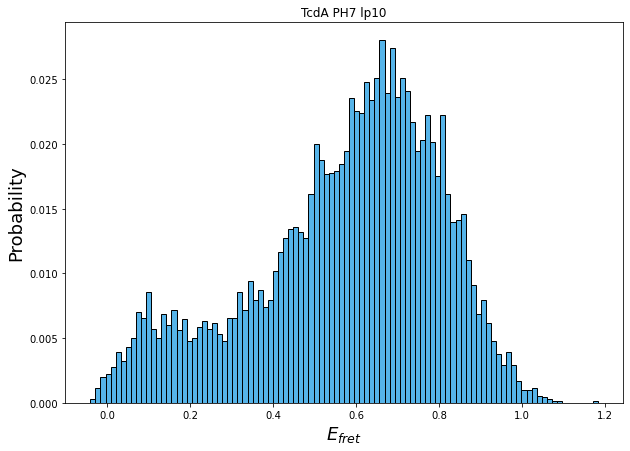

In [5]:
# plot histogram for all point-wise FRET efficiency: enter titlename
smfretd.plot_hist(pw_fret_all, 'TcdA PH7 lp10')